2nd Moments are plotted and averaged. 

In [1]:
import numpy as np
import pandas
from pandas.testing import assert_frame_equal

# Import the Rubin TAP service utilities
from lsst.rsp import get_tap_service, retrieve_query

# Astropy
from astropy import units as u
from astropy.coordinates import SkyCoord

# Set the maximum number of rows to display from pandas
pandas.set_option('display.max_rows', 20)


In [2]:
# Get an instance of the TAP service
service = get_tap_service()
# assert service is not None
# assert service.baseurl == "https://data.lsst.cloud/api/tap"

In [4]:
# Define the maximum records to return
max_rec = 1000

# Execute the same query using the maxrec parameter instead of the TOP
query = "SELECT Ixx_pixel, Ixx_pixel_u, Ixx_pixel_g, Ixx_pixel_r, Ixx_pixel_i, Ixx_pixel_z, Ixx_pixel_y, " \
        "Ixy_pixel, Ixy_pixel_u, Ixy_pixel_g, Ixy_pixel_r, Ixy_pixel_i, Ixy_pixel_z, Ixy_pixel_y, " \
        "Iyy_pixel, Iyy_pixel_u, Iyy_pixel_g, Iyy_pixel_r, Iyy_pixel_i, Iyy_pixel_z, Iyy_pixel_y, " \
        "IxxPSF_pixel, IxxPSF_pixel_u, IxxPSF_pixel_g, IxxPSF_pixel_r, IxxPSF_pixel_i, IxxPSF_pixel_z, IxxPSF_pixel_y, " \
        "IyyPSF_pixel, IyyPSF_pixel_u, IyyPSF_pixel_g, IyyPSF_pixel_r, IyyPSF_pixel_i, IyyPSF_pixel_z, IyyPSF_pixel_y, " \
        "IxyPSF_pixel, IxyPSF_pixel_u, IxyPSF_pixel_g, IxyPSF_pixel_r, IxyPSF_pixel_i, IxyPSF_pixel_z, IxyPSF_pixel_y " \
        "FROM dp01_dc2_catalogs.object " \
        "WHERE good = 1 AND clean = 1 AND extendedness = 1"\
        "AND mag_r < 24 " #\
#        "ORDER by mag_r DESC"
results = service.search(query, maxrec=max_rec).to_table().to_pandas()
assert len(results) == max_rec


In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'mathtext.default':  'regular' })

Text(0.5, 0, '$I_{xy}$')

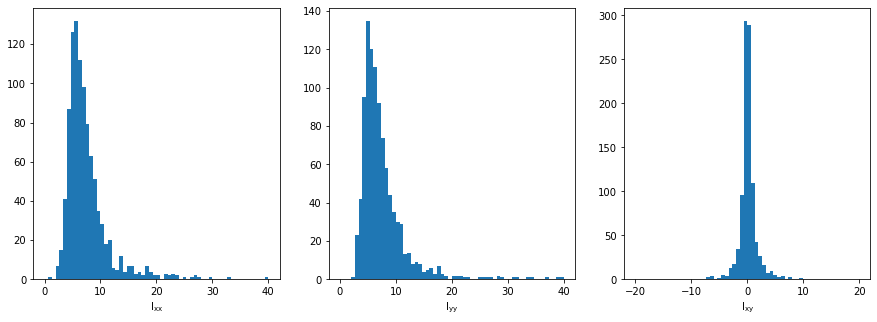

In [6]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=3)
rangeval = (0,40)
ax[0].hist(results.Ixx_pixel, bins=60, range=rangeval)
ax[1].hist(results.Iyy_pixel, bins=60, range=rangeval)
ax[2].hist(results.Ixy_pixel, bins=60, range=(-20,20))
ax[0].set_xlabel('$I_{xx}$')
ax[1].set_xlabel('$I_{yy}$')
ax[2].set_xlabel('$I_{xy}$')

Text(0.5, 0, '$I_{xy}PSF$')

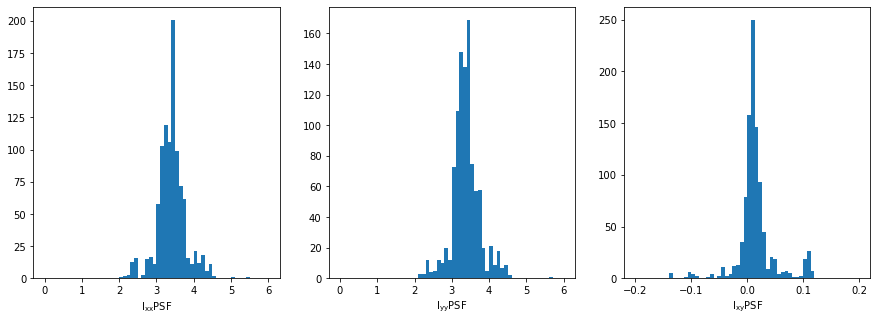

In [7]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=3)
rangeval = (0,6)
ax[0].hist(results.IxxPSF_pixel, bins=60, range=rangeval)
ax[0].set_xlabel('$I_{xx}PSF$')
ax[1].hist(results.IyyPSF_pixel, bins=60, range=rangeval)
ax[1].set_xlabel('$I_{yy}PSF$')
ax[2].hist(results.IxyPSF_pixel, bins=60, range=(-.2,.2))
ax[2].set_xlabel('$I_{xy}PSF$')


Text(0.5, 0, '$I_{xx}$z')

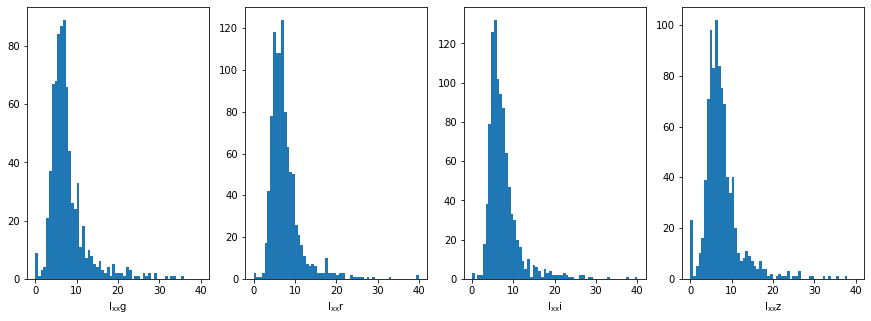

In [8]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=4)
rangeval = (0,40)
ax[0].hist(results.Ixx_pixel_g, bins=60, range=rangeval)
ax[1].hist(results.Ixx_pixel_r, bins=60, range=rangeval)
ax[2].hist(results.Ixx_pixel_i, bins=60, range=rangeval)
ax[3].hist(results.Ixx_pixel_z, bins=60, range=rangeval)
ax[0].set_xlabel('$I_{xx}$g')
ax[1].set_xlabel('$I_{xx}$r')
ax[2].set_xlabel('$I_{xx}$i')
ax[3].set_xlabel('$I_{xx}$z')

Text(0.5, 0, '$I_{yy}$z')

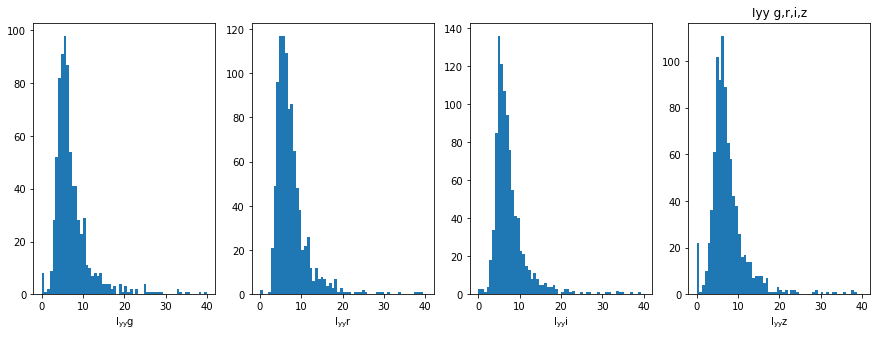

In [9]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=4)
plt.title('Iyy g,r,i,z')
rangeval = (0,40)
ax[0].hist(results.Iyy_pixel_g, bins=60, range=rangeval)
ax[1].hist(results.Iyy_pixel_r, bins=60, range=rangeval)
ax[2].hist(results.Iyy_pixel_i, bins=60, range=rangeval)
ax[3].hist(results.Iyy_pixel_z, bins=60, range=rangeval)
ax[0].set_xlabel('$I_{yy}$g')
ax[1].set_xlabel('$I_{yy}$r')
ax[2].set_xlabel('$I_{yy}$i')
ax[3].set_xlabel('$I_{yy}$z')

Text(0.5, 0, '$I_{xy}$z')

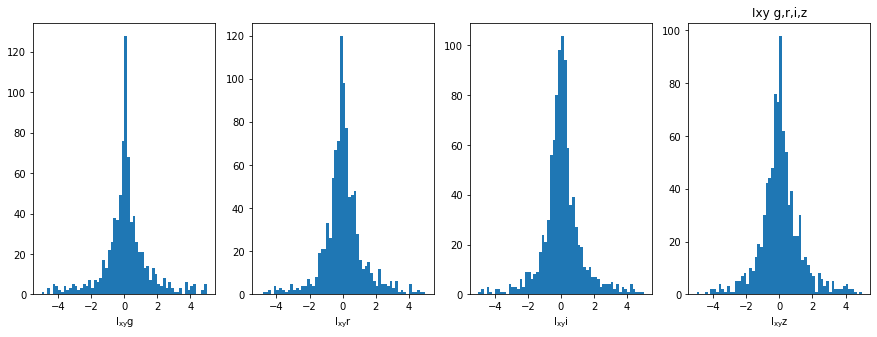

In [10]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=4)
plt.title('Ixy g,r,i,z')
plt.xlabel('Ixy')
rangeval = (-5,5)
ax[0].hist(results.Ixy_pixel_g, bins=60, range=rangeval)
ax[1].hist(results.Ixy_pixel_r, bins=60, range=rangeval)
ax[2].hist(results.Ixy_pixel_i, bins=60, range=rangeval)
ax[3].hist(results.Ixy_pixel_z, bins=60, range=rangeval)
ax[0].set_xlabel('$I_{xy}$g')
ax[1].set_xlabel('$I_{xy}$r')
ax[2].set_xlabel('$I_{xy}$i')
ax[3].set_xlabel('$I_{xy}$z')

Text(0.5, 0, '$I_{xx}$PSF-z')

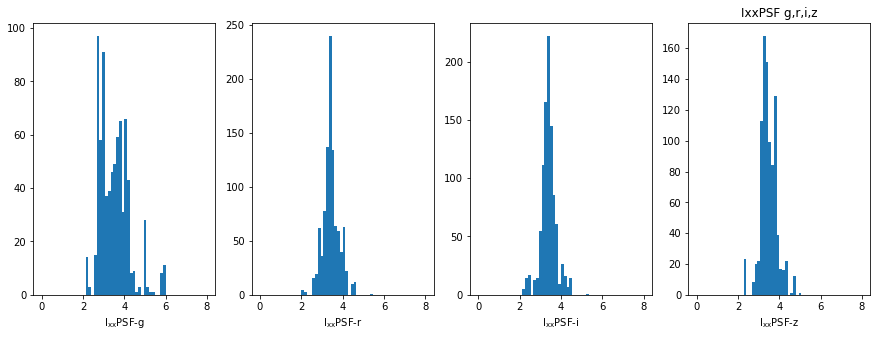

In [11]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=4)
plt.title('IxxPSF g,r,i,z')
plt.xlabel('IxxPSF')
rangeval = (0,8)
ax[0].hist(results.IxxPSF_pixel_g, bins=60, range=rangeval)
ax[1].hist(results.IxxPSF_pixel_r, bins=60, range=rangeval)
ax[2].hist(results.IxxPSF_pixel_i, bins=60, range=rangeval)
ax[3].hist(results.IxxPSF_pixel_z, bins=60, range=rangeval)
ax[0].set_xlabel('$I_{xx}$PSF-g')
ax[1].set_xlabel('$I_{xx}$PSF-r')
ax[2].set_xlabel('$I_{xx}$PSF-i')
ax[3].set_xlabel('$I_{xx}$PSF-z')

Text(0.5, 0, '$I_{yy}$PSF-z')

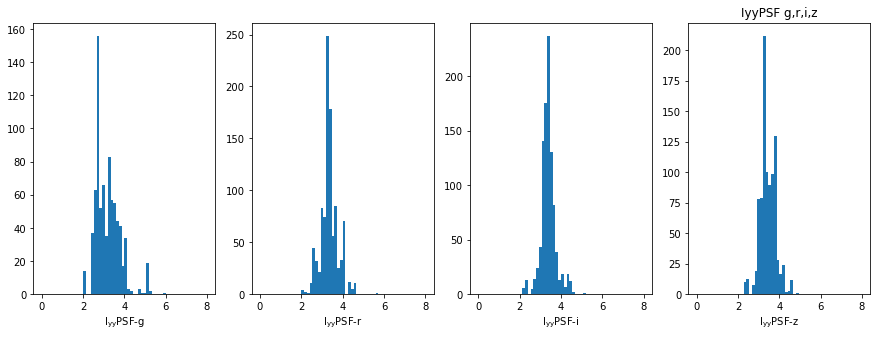

In [12]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=4)
plt.title('IyyPSF g,r,i,z')
plt.xlabel('IyyPSF')
rangeval = (0,8)
ax[0].hist(results.IyyPSF_pixel_g, bins=60, range=rangeval)
ax[1].hist(results.IyyPSF_pixel_r, bins=60, range=rangeval)
ax[2].hist(results.IyyPSF_pixel_i, bins=60, range=rangeval)
ax[3].hist(results.IyyPSF_pixel_z, bins=60, range=rangeval)
ax[0].set_xlabel('$I_{yy}$PSF-g')
ax[1].set_xlabel('$I_{yy}$PSF-r')
ax[2].set_xlabel('$I_{yy}$PSF-i')
ax[3].set_xlabel('$I_{yy}$PSF-z')

Text(0.5, 0, '$I_{xy}$PSF-z')

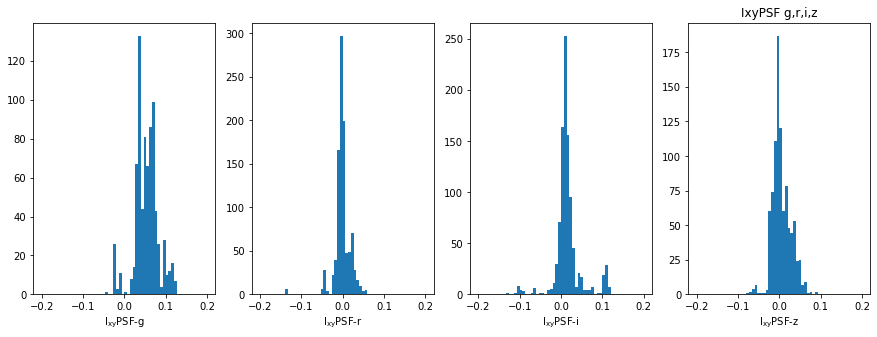

In [13]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=4)
plt.title('IxyPSF g,r,i,z')
plt.xlabel('IxyPSF')
rangeval = (-.2,.2)
ax[0].hist(results.IxyPSF_pixel_g, bins=60, range=rangeval)
ax[1].hist(results.IxyPSF_pixel_r, bins=60, range=rangeval)
ax[2].hist(results.IxyPSF_pixel_i, bins=60, range=rangeval)
ax[3].hist(results.IxyPSF_pixel_z, bins=60, range=rangeval)
ax[0].set_xlabel('$I_{xy}$PSF-g')
ax[1].set_xlabel('$I_{xy}$PSF-r')
ax[2].set_xlabel('$I_{xy}$PSF-i')
ax[3].set_xlabel('$I_{xy}$PSF-z')

In [14]:
n=634
print(results.Ixx_pixel_g[n], results.Ixx_pixel_r[n], results.Ixx_pixel_i[n], results.Ixx_pixel_z[n])
aveVal = (results.Ixx_pixel_g[n] + results.Ixx_pixel_r[n] + results.Ixx_pixel_i[n] + results.Ixx_pixel_z[n])/4.
print(aveVal, results.Ixx_pixel[n])


15.507672 17.2973232 14.846278 15.4884412
15.7849286 14.8360278


Text(0.5, 0, '$I_{xx}/I_{xy}$')

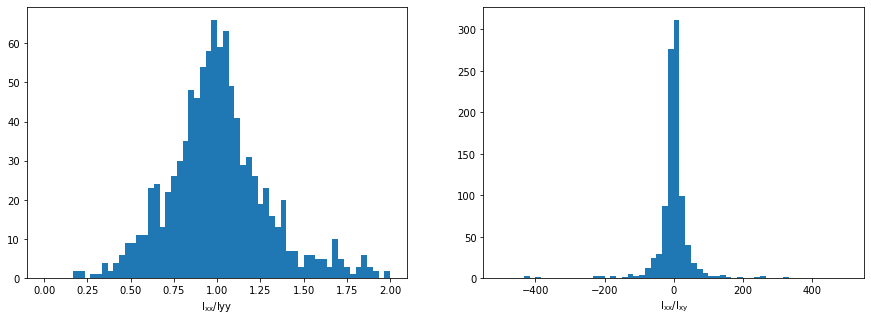

In [15]:
fig, ax = plt.subplots(figsize =(15, 5), nrows=1, ncols=2)
ax[0].hist(results.Ixx_pixel/results.Iyy_pixel, bins=60, range=(0,2))
ax[0].set_xlabel('$I_{xx}/I{yy}$')
ax[1].hist(results.Ixx_pixel/results.Ixy_pixel, bins=60, range=(-500,500))
ax[1].set_xlabel('$I_{xx}/I_{xy}$')

In [16]:
for n in range(53, 59):
    print('n,  u    g    r   i    z    y')
    print(n, results.Iyy_pixel_u[n], results.Iyy_pixel_g[n], results.Iyy_pixel_r[n], results.Iyy_pixel_i[n], results.Iyy_pixel_z[n], results.Iyy_pixel_y[n])
    print('Listed Average: ', results.Iyy_pixel[n])
    ave = [results.Iyy_pixel_u[n], results.Iyy_pixel_g[n], results.Iyy_pixel_r[n], results.Iyy_pixel_i[n], results.Iyy_pixel_z[n], results.Iyy_pixel_y[n]]
    print('u, g, r, i, z, y average: ', np.average(ave))
    

n,  u    g    r   i    z    y
53 0.0833333 6.2990679 7.8721552 21.590176 0.0833333 8.504232
Listed Average:  6.3513492
u, g, r, i, z, y average:  7.40538295
n,  u    g    r   i    z    y
54 nan 5.4297257 3.2461704 5.9873673 nan 0.0833333
Listed Average:  9.0758517
u, g, r, i, z, y average:  nan
n,  u    g    r   i    z    y
55 nan 24.9722328 4.3413375 7.6922921 0.0833333 1306.4278003
Listed Average:  7.5906661
u, g, r, i, z, y average:  nan
n,  u    g    r   i    z    y
56 0.0833333 5.5601171 5.6678538 5.8485405 nan 9.3651327
Listed Average:  5.8777542
u, g, r, i, z, y average:  nan
n,  u    g    r   i    z    y
57 5.6016092 5.7736268 6.7683231 7.1331398 nan 8.8414857
Listed Average:  7.1716156
u, g, r, i, z, y average:  nan
n,  u    g    r   i    z    y
58 1586.6696562 1485.3294775 8.9070237 7.865954 8.0546323 7.7512532
Listed Average:  7.837577
u, g, r, i, z, y average:  517.42966615
